#IDA

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact_manual
import plotly.express as px

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/stroke.csv')


Mounted at /content/drive


In [ ]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df.shape

(5110, 11)

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#Checking NA
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


#Data Cleaning

In [ ]:
# impute bmi column with mean and print  first ten

df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.head(10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [ ]:
numerical = df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [ ]:
df.hypertension.value_counts()

,count
hypertension,
0,4612
1,498


([<matplotlib.patches.Wedge at 0x7ffaf148bfd0>,
 [Text(-1.3348942113978373, 0.42196853481811436, 'No Hypertension'),
  Text(1.1441950298751005, -0.3616873423402018, 'Hypertension')],
 [Text(-0.8581462787557526, 0.2712654866687878, '90.3%'),
  Text(0.6674471007604752, -0.21098428303178438, '9.7%')])

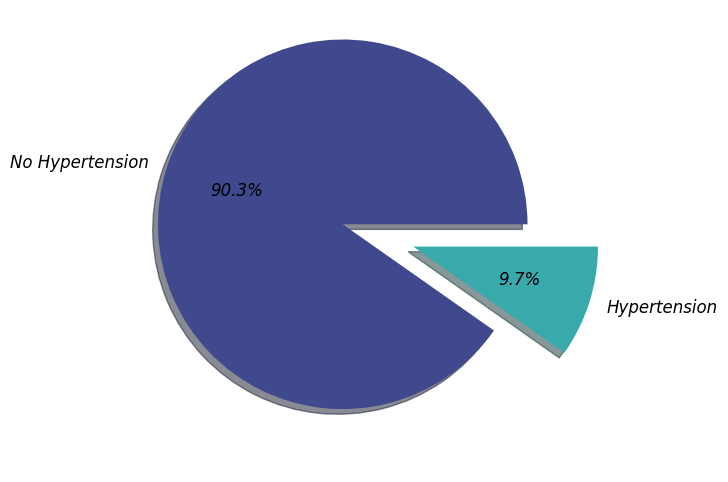

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df.hypertension.value_counts(),labels=['No Hypertension','Hypertension'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

In [ ]:
df.heart_disease.value_counts()

,count
heart_disease,
0,4834
1,276


([<matplotlib.patches.Wedge at 0x7ffaf1371ff0>,
 [Text(-1.3798936980729009, 0.23641781239723444, 'No Heart disease'),
  Text(1.182766015061574, -0.2026439084092213, 'Heart disease')],
 [Text(-0.8870745201897219, 0.1519828793982221, '94.6%'),
  Text(0.6899468421192514, -0.11820894657204575, '5.4%')])

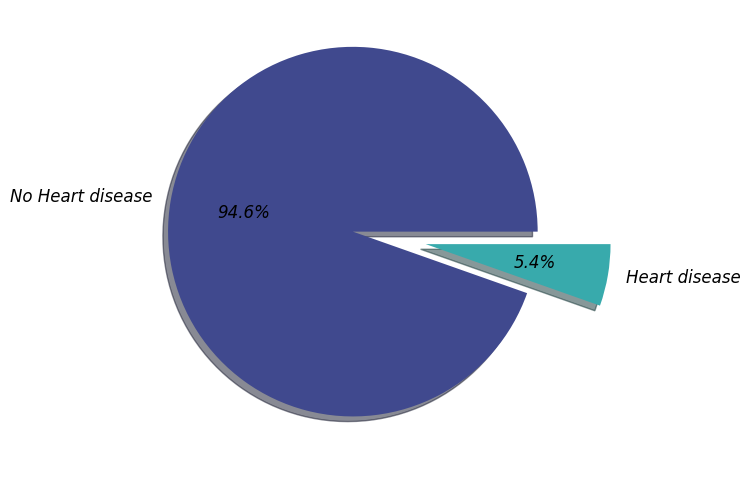

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df.heart_disease.value_counts(),labels=['No Heart disease','Heart disease'],autopct='%1.1f%%',
        colors=sns.color_palette('mako',2),explode=(0.3,0.1),shadow=True,textprops={'fontsize':12,'style':'italic'})

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

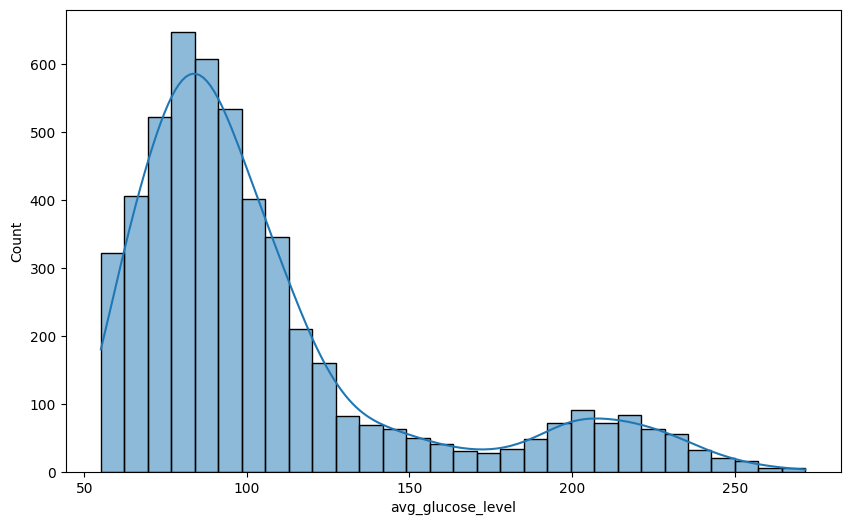

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df.avg_glucose_level,kde=True,bins=30)

<Axes: xlabel='bmi', ylabel='Count'>

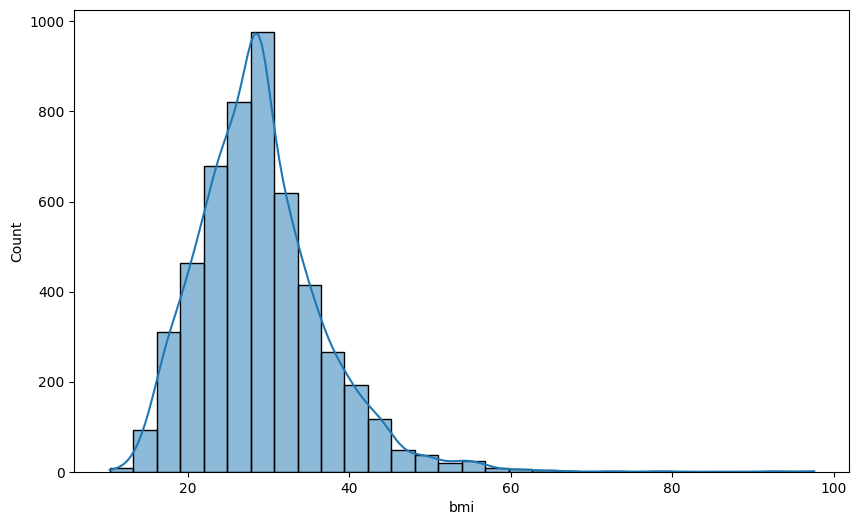

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df.bmi,kde=True,bins=30)

#Outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='age'>

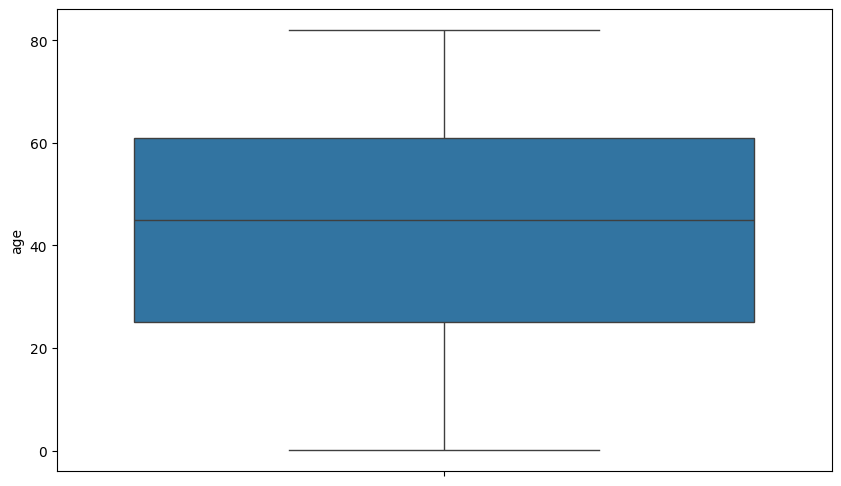

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df.age)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='avg_glucose_level'>

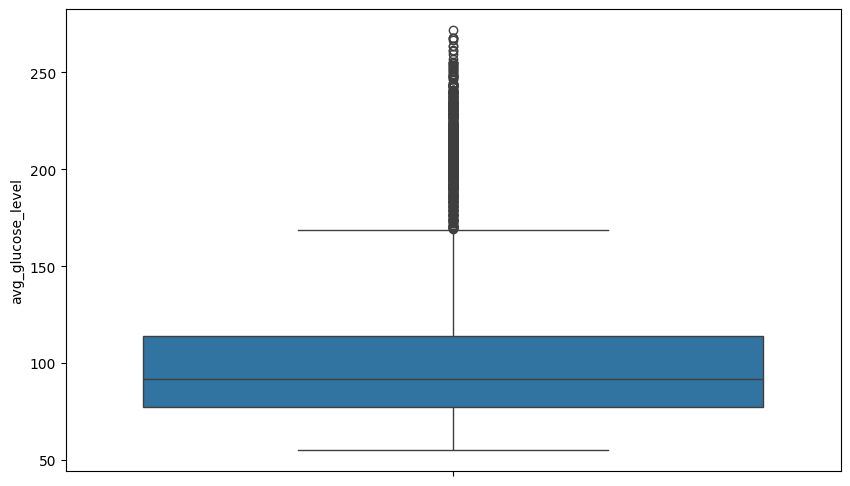

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df.avg_glucose_level)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='bmi'>

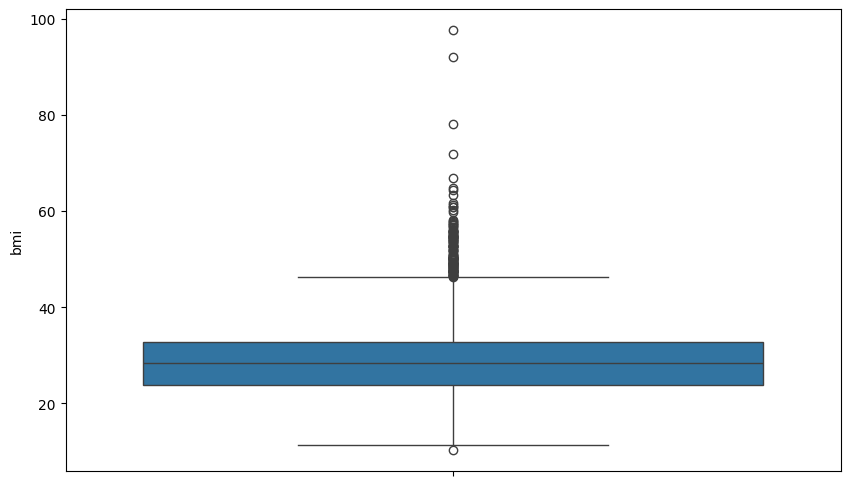

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df.bmi)

In [ ]:
# prompt: handle outlier from avg_glucose_level and bmi dont remove it

import numpy as np
def handle_outliers_with_capping(df, column):
  """Handles outliers by capping them at a specified percentile."""
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

  return df

df = handle_outliers_with_capping(df, 'avg_glucose_level')
df = handle_outliers_with_capping(df, 'bmi')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='bmi'>

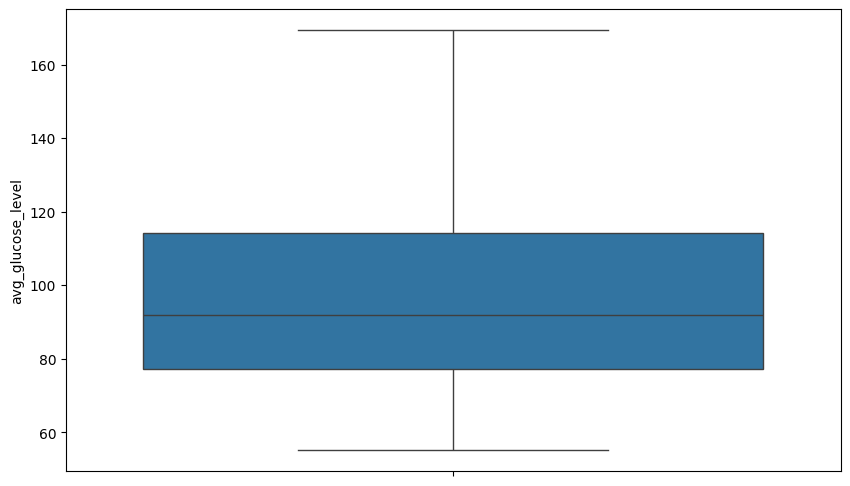

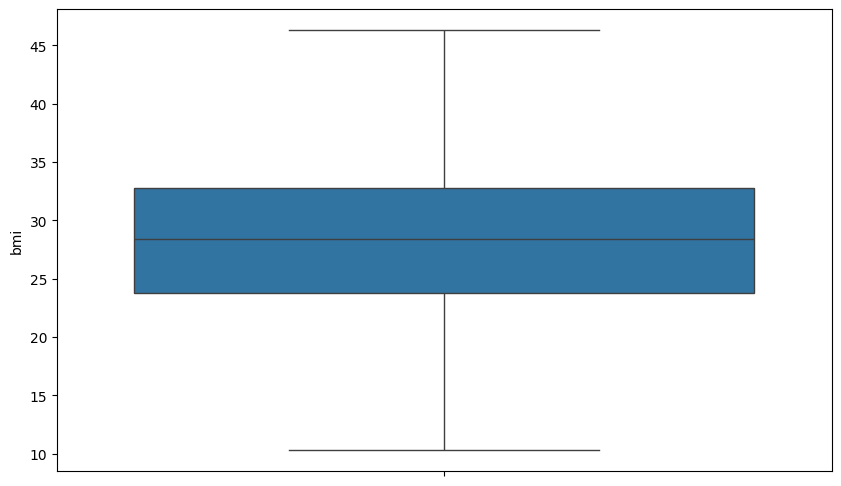

In [ ]:
# prompt: print boxplot back

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(df.avg_glucose_level)
plt.figure(figsize=(10,6))
sns.boxplot(df.bmi)


# Scalling numeric data

In [ ]:
# prompt: standardize only age, avg_glucose_level and bmi

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select the columns to standardize
cols_to_standardize = ['age', 'avg_glucose_level', 'bmi']

# Fit and transform the selected columns
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051434,0,1,Yes,Private,Urban,2.058363,1.106633,formerly smoked,1
1,Female,0.786070,0,0,Yes,Self-employed,Rural,2.058363,0.024107,never smoked,1
2,Male,1.626390,0,1,Yes,Private,Rural,0.148256,0.530729,never smoked,1
3,Female,0.255342,0,0,Yes,Private,Urban,2.058363,0.797611,smokes,1
4,Female,1.582163,1,0,Yes,Self-employed,Rural,2.058363,-0.663218,never smoked,1


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5.110000e+03,5110.000000,5110.000000,5.110000e+03,5.110000e+03,5110.000000
mean,5.005781e-17,0.097456,0.054012,-3.392807e-16,1.668594e-17,0.048728
std,1.000098e+00,0.296607,0.226063,1.000098e+00,1.000098e+00,0.215320
min,-1.908261e+00,0.000000,0.000000,-1.381335e+00,-2.587580e+00,0.000000
25%,-8.061152e-01,0.000000,0.000000,-7.151503e-01,-6.913112e-01,0.000000
50%,7.843218e-02,0.000000,0.000000,-2.743389e-01,-4.517511e-02,0.000000
75%,7.860701e-01,0.000000,0.000000,3.942550e-01,5.728681e-01,0.000000
max,1.714845e+00,1.000000,1.000000,2.058363e+00,2.469137e+00,1.000000


# Scalling discrete data

In [ ]:
categories = df.select_dtypes(include=['object']).columns.tolist()
categories

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
df.gender.value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [ ]:
df.drop(df[df.gender == 'Other'].index,inplace=True)
df.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


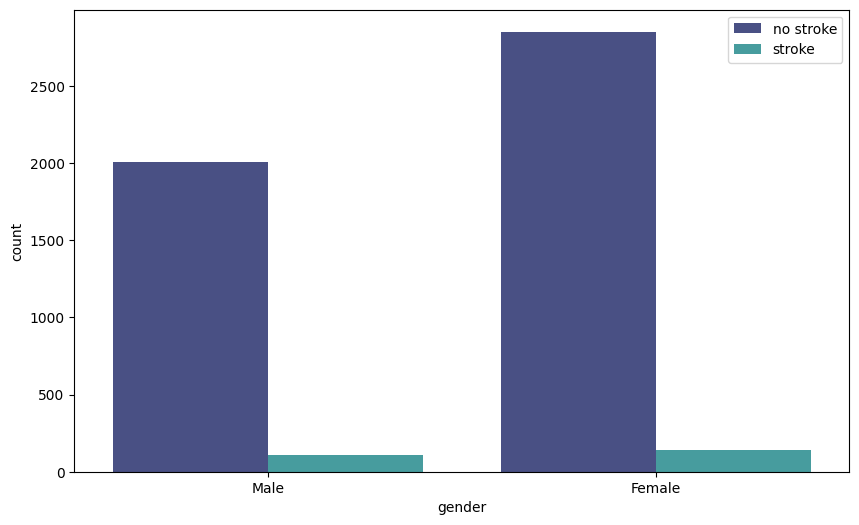

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="gender", data=df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [ ]:
df.gender = df.gender.map({'Male':0,'Female':1})

In [ ]:
df.ever_married.value_counts()

,count
ever_married,
Yes,3353
No,1756


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


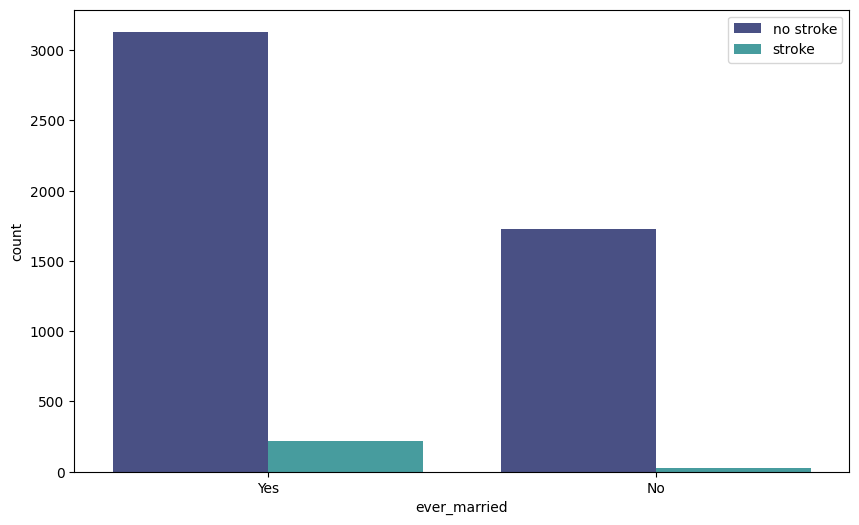

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="ever_married", data=df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [ ]:
df.ever_married = df.ever_married.map({'No':0,'Yes':1})

In [ ]:
df.work_type.value_counts()

,count
work_type,
Private,2924
Self-employed,819
children,687
Govt_job,657
Never_worked,22


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


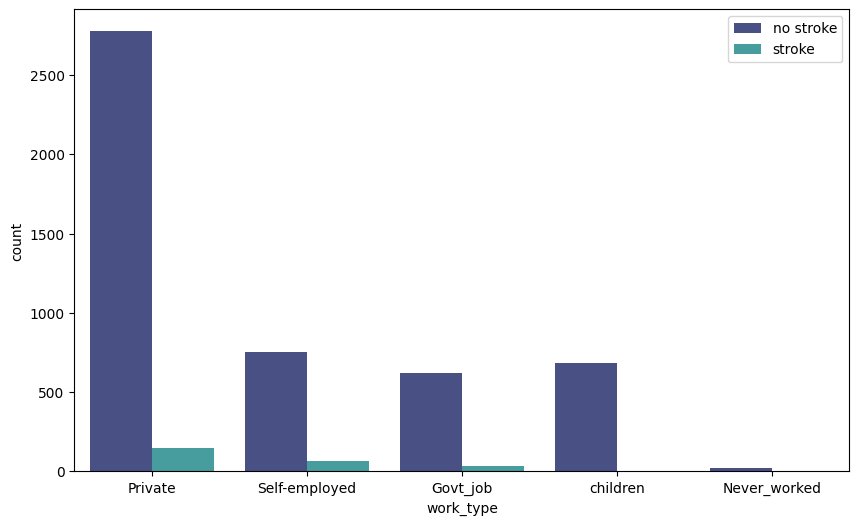

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="work_type", data=df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [ ]:
# prompt: for work_type i want one hot encoding with value 1 and 0 under each column 1 for false and 0 for true

import pandas as pd
# Create dummy variables for 'work_type'
work_type_dummies = pd.get_dummies(df['work_type'], prefix='work_type', dtype=int)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, work_type_dummies], axis=1)

# Drop the original 'work_type' column
df.drop('work_type', axis=1, inplace=True)

# Display the updated DataFrame
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1.051434,0,1,1,Urban,2.058363,1.106633,formerly smoked,1,0,0,1,0,0
1,1,0.786070,0,0,1,Rural,2.058363,0.024107,never smoked,1,0,0,0,1,0
2,0,1.626390,0,1,1,Rural,0.148256,0.530729,never smoked,1,0,0,1,0,0
3,1,0.255342,0,0,1,Urban,2.058363,0.797611,smokes,1,0,0,1,0,0
4,1,1.582163,1,0,1,Rural,2.058363,-0.663218,never smoked,1,0,0,0,1,0


In [ ]:
df.Residence_type.value_counts()

,count
Residence_type,
Urban,2596
Rural,2513


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


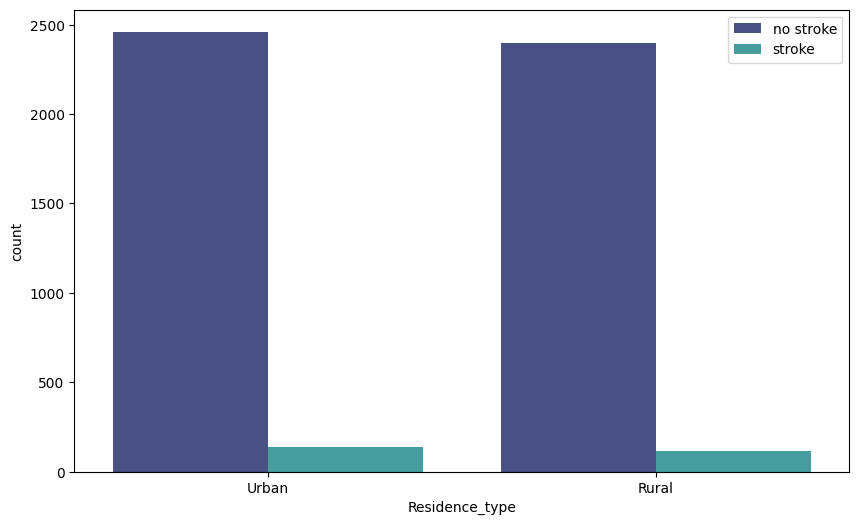

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Residence_type", data=df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [ ]:
df.Residence_type = df.Residence_type.map({'Urban':0,'Rural':1})

In [ ]:
df.smoking_status.value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,884
smokes,789


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


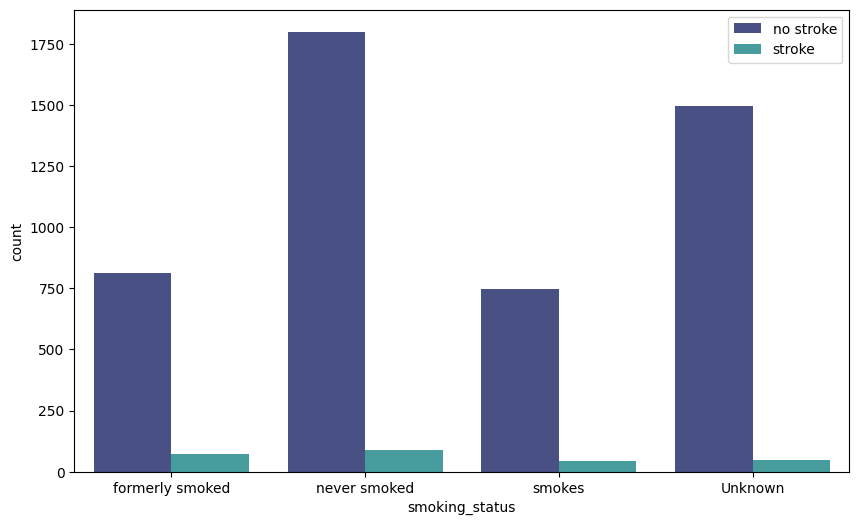

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoking_status", data=df, palette='mako',hue='stroke')
plt.legend(['no stroke','stroke'])

In [ ]:
# prompt: for smoking_status i want one hot encoding with value 1 and 0 under each column 1 for false and 0 for true

import pandas as pd
# Create dummy variables for 'smoking_status'
smoking_status_dummies = pd.get_dummies(df['smoking_status'], prefix='smoking_status', dtype=int)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, smoking_status_dummies], axis=1)

# Drop the original 'smoking_status' column
df.drop('smoking_status', axis=1, inplace=True)

# Display the updated DataFrame
df.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1.051434,0,1,1,0,2.058363,1.106633,1,0,0,1,0,0,0,1,0,0
1,1,0.786070,0,0,1,1,2.058363,0.024107,1,0,0,0,1,0,0,0,1,0
2,0,1.626390,0,1,1,1,0.148256,0.530729,1,0,0,1,0,0,0,0,1,0
3,1,0.255342,0,0,1,0,2.058363,0.797611,1,0,0,1,0,0,0,0,0,1
4,1,1.582163,1,0,1,1,2.058363,-0.663218,1,0,0,0,1,0,0,0,1,0


<Axes: >

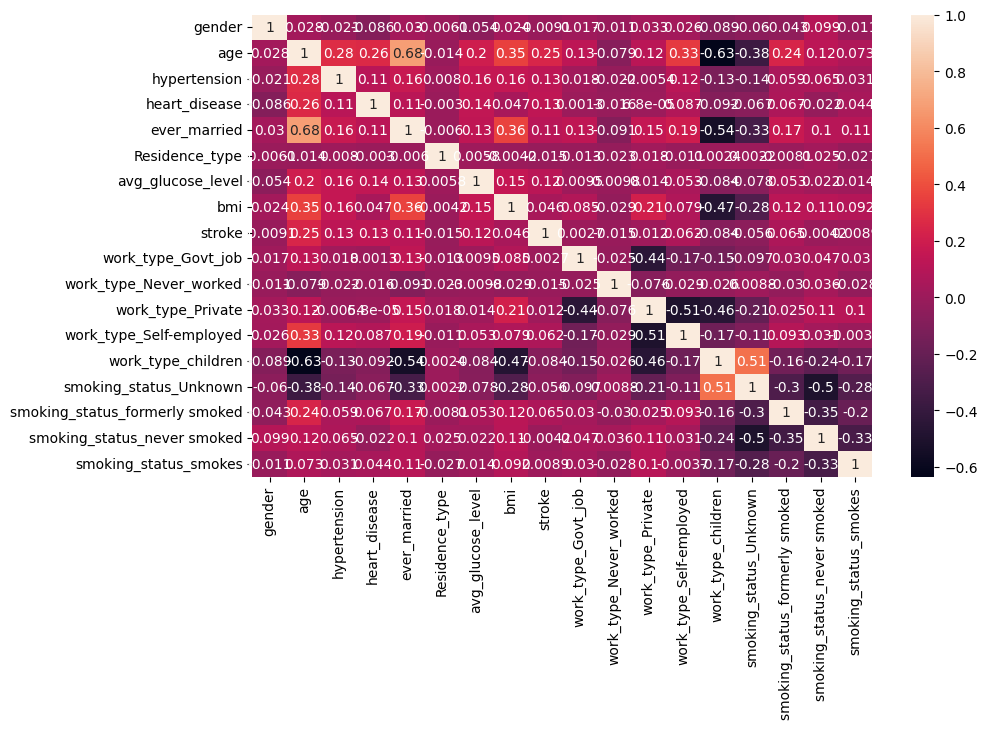

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# prompt: check for skewness

# Check skewness
for feature in df:
  print(f"Skewness of {feature}: {df[feature].skew()}")


Skewness of gender: -0.3494099990386462
Skewness of age: -0.1374301926292132
Skewness of hypertension: 2.715026136949753
Skewness of heart_disease: 3.9467864430646906
Skewness of ever_married: -0.6583448179224691
Skewness of Residence_type: 0.03250551429923471
Skewness of avg_glucose_level: 0.9360521830491011
Skewness of bmi: 0.4359664055303228
Skewness of stroke: 4.1928068074994735
Skewness of work_type_Govt_job: 2.219622177275417
Skewness of work_type_Never_worked: 15.144843094175494
Skewness of work_type_Private: -0.29245400379529657
Skewness of work_type_Self-employed: 1.8523009713864769
Skewness of work_type_children: 2.143534146838143
Skewness of smoking_status_Unknown: 0.861668935428292
Skewness of smoking_status_formerly smoked: 1.729276836850054
Skewness of smoking_status_never smoked: 0.5372263669183076
Skewness of smoking_status_smokes: 1.9131317548025093


In [ ]:
# prompt: check missing value

df.isnull().sum()


,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
Residence_type,0
avg_glucose_level,0
bmi,0
stroke,0
work_type_Govt_job,0


In [ ]:
x = df.drop('stroke', axis = 1)
y = pd.to_numeric( df['stroke'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = .20)

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import EditedNearestNeighbours  # Import ENN

# Create an ADASYN object (for over-sampling)
adasyn = ADASYN()

# Create an Edited Nearest Neighbors object (for under-sampling)
enn = EditedNearestNeighbours()

# Create a pipeline combining ADASYN and ENN
adasyn_enn = Pipeline([('adasyn', adasyn), ('enn', enn)])  # Change TomekLinks to ENN

# Apply ADASYN + ENN to the training data
X_resampled, y_resampled = adasyn_enn.fit_resample(x_train, y_train)  # Ensure variable names are correct, x_train is lowercase



In [ ]:
# prompt: show result before and after sampling

import pandas as pd
# Before Sampling
print("Before Sampling:")
print(y_train.value_counts())

# After Sampling
print("\nAfter Sampling (ADASYN + Tomek Links):")
print(pd.Series(y_resampled).value_counts())


Before Sampling:
stroke
0    3879
1     208
Name: count, dtype: int64

After Sampling (ADASYN + Tomek Links):
stroke
0    3879
1    3625
Name: count, dtype: int64


#Random Forest

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1163
           1       0.93      0.98      0.96      1089

    accuracy                           0.96      2252
   macro avg       0.96      0.96      0.96      2252
weighted avg       0.96      0.96      0.96      2252



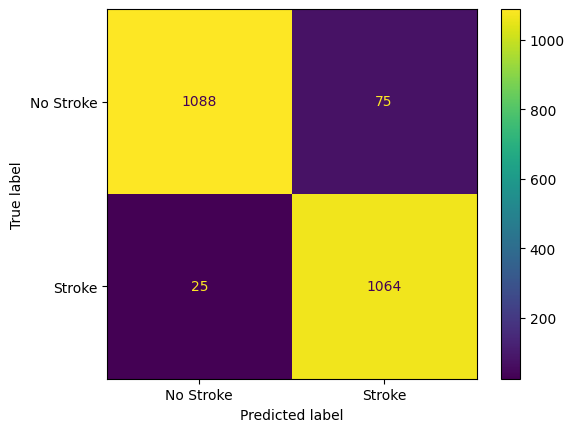

In [ ]:
!pip install scikit-learn
from sklearn.metrics import classification_report # import the missing module
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # import the missing module
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix # import the missing function
import pandas as pd

X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)
model = RandomForestClassifier(random_state=1234)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Stroke','Stroke']).plot()

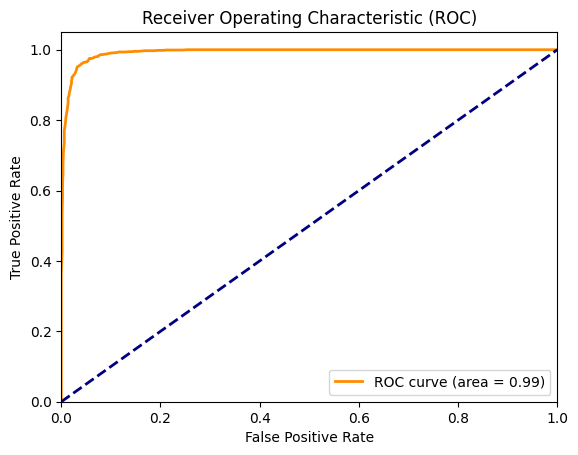

In [ ]:
# prompt: plot ROC AUC

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred from your model
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#Logistic regression

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1163
           1       0.83      0.85      0.84      1089

    accuracy                           0.84      2252
   macro avg       0.84      0.84      0.84      2252
weighted avg       0.84      0.84      0.84      2252



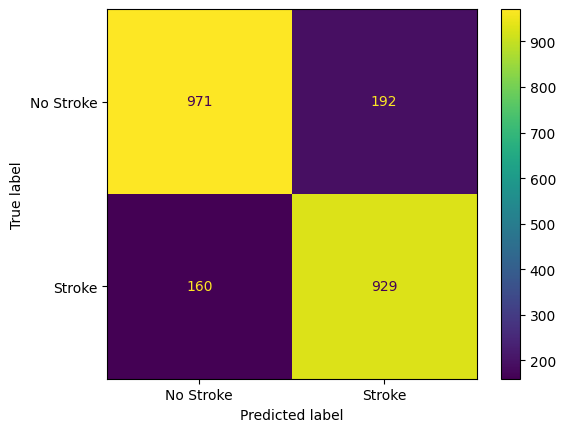

In [ ]:
!pip install scikit-learn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Instantiate the Logistic Regression model
model = LogisticRegression(random_state=1234, max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)  # Fit the model

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['No Stroke', 'Stroke']).plot()


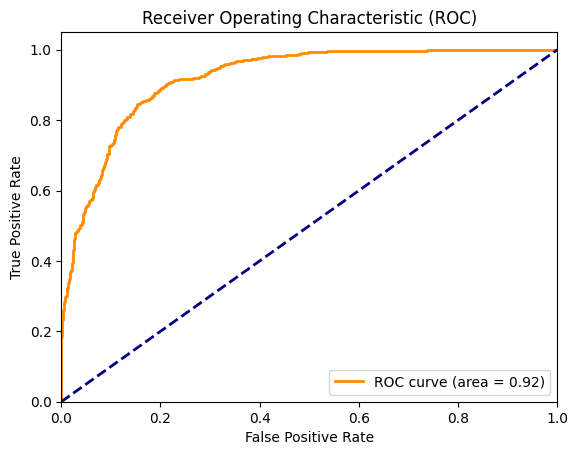

In [ ]:
# prompt: plot roc

import matplotlib.pyplot as plt
# Assuming you have y_test and y_pred_proba from your model
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Naive bayes


              precision    recall  f1-score   support

           0       0.98      0.23      0.37      1163
           1       0.55      1.00      0.71      1089

    accuracy                           0.60      2252
   macro avg       0.76      0.61      0.54      2252
weighted avg       0.77      0.60      0.53      2252



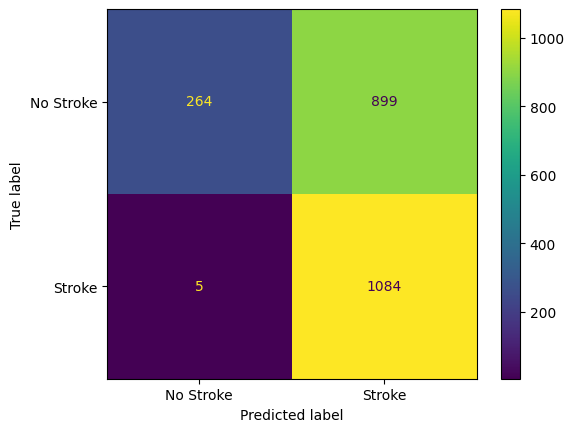

In [ ]:
!pip install scikit-learn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Import GaussianNB for Naive Bayes
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Instantiate the Naive Bayes model
model = GaussianNB()  # Create an instance of GaussianNB
model.fit(X_train, y_train)  # Fit the model

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['No Stroke', 'Stroke']).plot()


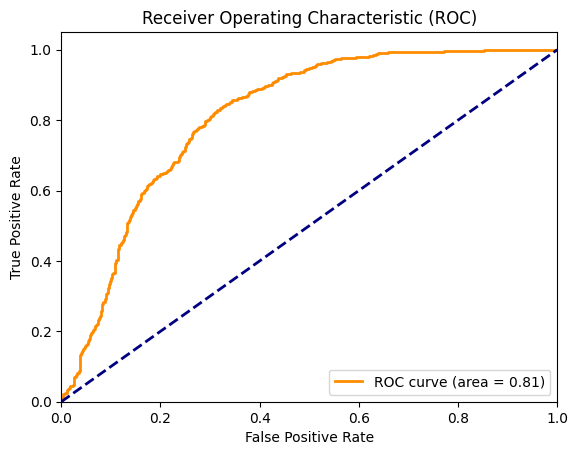

In [ ]:
# prompt: plot ROC

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred_proba from your model
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7315 - loss: 0.5433 - val_accuracy: 0.8069 - val_loss: 0.4136
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8338 - loss: 0.3774 - val_accuracy: 0.8411 - val_loss: 0.3704
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8601 - loss: 0.3237 - val_accuracy: 0.8677 - val_loss: 0.3159
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8777 - loss: 0.2913 - val_accuracy: 0.8744 - val_loss: 0.2927
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9055 - loss: 0.2429 - val_accuracy: 0.8687 - val_loss: 0.2891
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9118 - loss: 0.2335 - val_accuracy: 0.8792 - val_loss: 0.2860
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9030 - loss: 0.2318 - val_accuracy: 0.8991 - val_loss: 0.2474
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9158 - loss: 0.2057 - val_accuracy: 

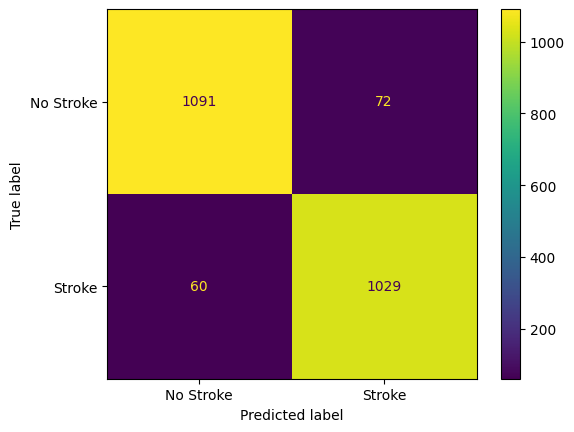

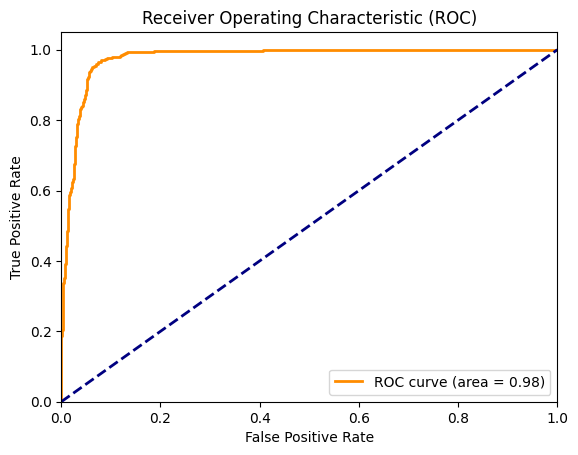

In [ ]:
# prompt: perform ANN 5 layer

import matplotlib.pyplot as plt
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['No Stroke', 'Stroke']).plot()

# Assuming you have y_test and y_pred_proba from your model
y_pred_proba = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1163
           1       0.94      0.96      0.95      1089

    accuracy                           0.95      2252
   macro avg       0.95      0.95      0.95      2252
weighted avg       0.95      0.95      0.95      2252



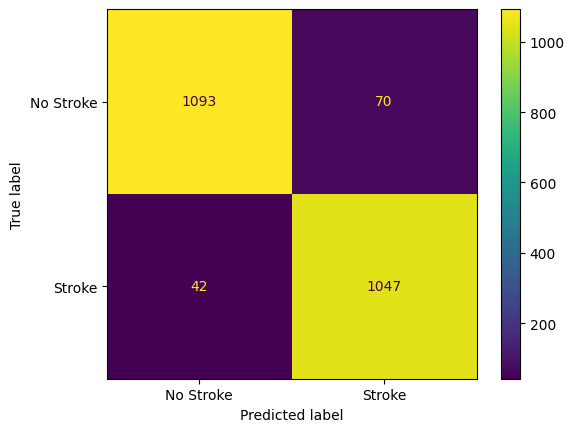

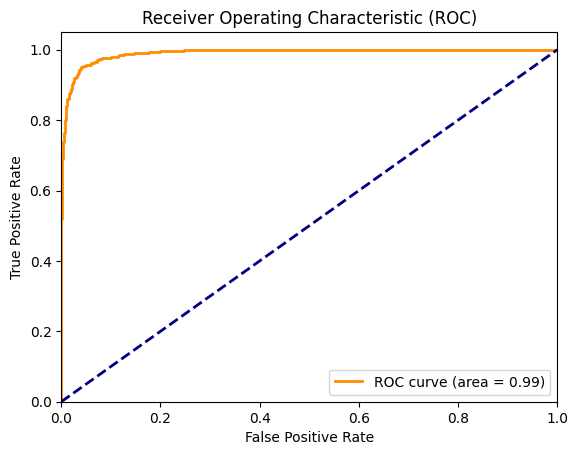

In [ ]:
# prompt: perform XGBoost

import matplotlib.pyplot as plt
!pip install xgboost

from xgboost import XGBClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Instantiate the XGBoost model
model = XGBClassifier(random_state=1234)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['No Stroke', 'Stroke']).plot()


# Assuming you have y_test and y_pred_proba from your model
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
